# PID Temperature Controller
Implemented in VHDL for Basys-3 FPGA using Vivado. 

Implementation details:
* 4bit target mapped to switches on board.
* Fixed-point arithmetic in Q8.8.

```mermaid
graph LR
    %% --- Define all nodes first ---
    N_Target["target<br> (4bit)"]
    %% Using Sigma for the summing junction N_SumError
    N_SumError((S))
    N_P["pid_pterm.vhd (Kp)"]
    N_I["pid_iterm.vhd (Ki)"]
    N_D["pid_dterm.vhd (Kd)"]
    %% Using Sigma for the summing junction N_SumPID
    N_SumPID((S))
    %% Matched Plant node text to your screenshot
    N_Plant["plant2.vhd"]

    %% --- Define links between nodes ---
    N_Target --(+)--> N_SumError
    N_SumError --error_calc.vhd--> N_P
    N_SumError --error_calc.vhd--> N_I
    N_SumError --error_calc.vhd--> N_D

    N_P --> N_SumPID
    N_I --> N_SumPID
    N_D --> N_SumPID

    N_SumPID --control_in--> N_Plant
    N_Plant --(-)--> N_SumError
```

## Phase 1: P-term only. 
We develop all the code to run a p-only controller. Signals are exposed at the top level to export signals to csv, plotted below.

In [3]:
import polars as pl
import seaborn as sns
sim_data = r'C:\prog\fpga\PID_temp_controller\PID_temp_controller.sim\sim_1\behav\xsim\pid_simulation_data.csv'
df = pl.read_csv(sim_data)

dfp = df.with_columns(
    ((pl.col('Time')*1e-9)*1e3).alias('time_ms')
)
#dfp.head()

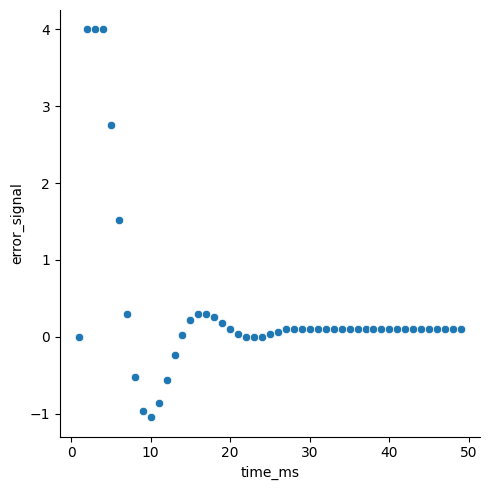

In [18]:
sns.relplot(dfp, x='time_ms',y='error_signal')

**Zooming in on value that it settles at:**

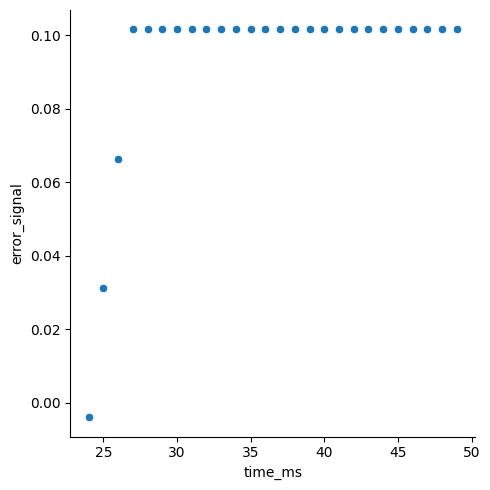

In [19]:
sns.relplot(dfp.filter(pl.col('time_ms') > 24), x='time_ms',y='error_signal')